In [70]:
import numpy as np
import pandas as pd
import pylab as plt
%matplotlib inline
from scipy import interpolate

In [71]:
sen_rsp = pd.ExcelFile('../sp_rep/Sentbands.xlsx')

In [72]:
swl = np.array(sen_rsp.parse('Spectral Responses')['SR_WL'])
cname= 'SR_AV_B2', 'SR_AV_B3', 'SR_AV_B4', 'SR_AV_B8',  'SR_AV_B11', 'SR_AV_B12','SR_AV_B8A'
sen_rsr = [np.array(sen_rsp.parse('Spectral Responses')[i]) for i in cname]

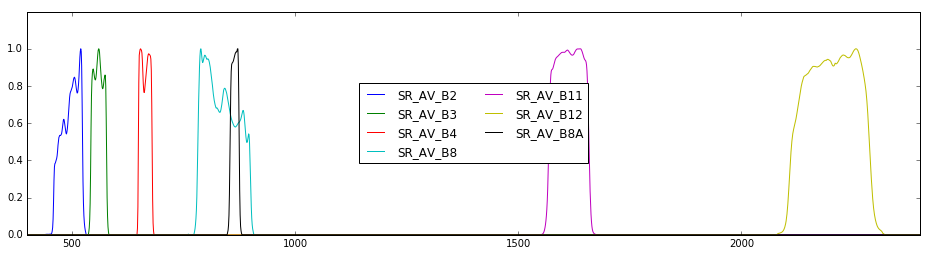

In [73]:
plt.figure(figsize=(16,4))

for i,k in enumerate(sen_rsr):
    plt.plot(swl, k, label = cname[i])
    plt.xlim(400,2400)    
plt.ylim(0,1.2)
plt.legend(loc="center", ncol=2)

In [74]:
bounds = np.array([[swl[sen_rsr[i]>0][0], swl[sen_rsr[i]>0][-1]] for i in range(7)])

In [81]:
bounds

array([[ 440,  538],
       [ 537,  582],
       [ 646,  684],
       [ 760,  908],
       [1539, 1682],
       [2078, 2320],
       [ 848,  881]])

In [76]:
 (1, 0.427, 0.457,
                      np.array([7.30000000e-05, 2.52450000e-03, 2.47670000e-02,
                                3.85985000e-01, 9.08749000e-01, 9.80591500e-01,
                                9.86713000e-01, 9.96568500e-01, 9.82780000e-01,
                                8.25707000e-01, 2.26412000e-01, 2.55700000e-02,
                                2.41400000e-03]))


(1, 0.427, 0.457, array([  7.30000000e-05,   2.52450000e-03,   2.47670000e-02,
          3.85985000e-01,   9.08749000e-01,   9.80591500e-01,
          9.86713000e-01,   9.96568500e-01,   9.82780000e-01,
          8.25707000e-01,   2.26412000e-01,   2.55700000e-02,
          2.41400000e-03]))

In [105]:
bands = (2,3,4,8,11,12,13)
S2_RSRs = []
for i in range(7):
    bo, up = bounds[i]
    f = interpolate.interp1d(swl,sen_rsr[i])
    xnew = np.arange(bo,up+1, 2.5)
    ynew = f(xnew)
    S2_RSRs.append((bands[i], xnew[0]/1000., xnew[-1]/1000., np.array(ynew)))

In [106]:
import pickle
pickle.dump(S2_RSRs, open('S2_RSRs.pkl', 'w'))